In [ ]:
import numpy as np 
import pandas as pd 
import json
from pandas.io.json import json_normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Loading data
users = []
with open('/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
users_df = pd.DataFrame(users)

In [ ]:
### Preprocessing data

# Removing user_ids and names of users
users_df = users_df.drop("user_id",axis = 1)
users_df = users_df.drop("name",axis = 1)

friends_count = []
elite_count = []

# Calculating the number of friends and elite years of each user and adding them to the data
for v in users_df['friends']:
    num = v.count(",")+1
    friends_count.append(num)
users_df['number_of_friends'] = friends_count
friends_count.clear()
for v in users_df['elite']:
    num = v.count(",")+1
    elite_count.append(num)
users_df['elite_years'] = elite_count
# Removing the friends and elite years list and the joining date of users
users_df = users_df.drop("friends",axis = 1)
users_df = users_df.drop("elite",axis = 1)
users_df = users_df.drop("yelping_since",axis = 1)
convert_dict = {}
for col in users_df.columns:
    convert_dict[col] = 'float'
users_df = users_df.astype(convert_dict)
users_df = users_df.round(9)
# Taking log of data
for col in users_df.columns: 
    if not (col == 'average_stars'):
        users_df[col] = np.log(users_df[col])
# Removing -inf from data
users_df = users_df.replace(to_replace =-np.inf,value = 0)

In [ ]:
### Standardizing data

scaler = StandardScaler()
scaler.fit(users_df)
transformed_data = scaler.transform(users_df)
transformed_data = pd.DataFrame(transformed_data,columns = users_df.columns)

In [ ]:


# Creating the correaltion Matrix
corr_matrix = transformed_data.corr()

# Finding the attributes with highest correlation
s = corr_matrix.unstack()
top_correlations = s.sort_values(kind='quicksort')[lambda k:k>0.8][lambda k: k<1.0]

# Creating groups of most Correlated data
review_feedback_factor = transformed_data[['funny','cool','useful']]
review_compliment_factor = transformed_data[['compliment_hot','compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos']]

### PCA
pca = PCA(n_components=1)
pca.fit(analysis_group_1)
review_feedback_factor = pca.transform(analysis_group_1)

pca.fit(analysis_group_2)
review_compliment_factor = pca.transform(analysis_group_2)

transformed_data['review_feedback_factor'] = review_feedback_factor
transformed_data['review_compliment_factor'] = review_compliment_factor

# Dropping already used attributes

transformed_data = transformed_data.drop("funny",axis = 1)
transformed_data = transformed_data.drop("cool",axis = 1)
transformed_data = transformed_data.drop("useful",axis = 1)
transformed_data = transformed_data.drop("compliment_hot",axis = 1)
transformed_data = transformed_data.drop("compliment_more",axis = 1)
transformed_data = transformed_data.drop("compliment_profile",axis = 1)
transformed_data = transformed_data.drop("compliment_cute",axis = 1)
transformed_data = transformed_data.drop("compliment_list",axis = 1)
transformed_data = transformed_data.drop("compliment_note",axis = 1)
transformed_data = transformed_data.drop("compliment_plain",axis = 1)
transformed_data = transformed_data.drop("compliment_cool",axis = 1)
transformed_data = transformed_data.drop("compliment_funny",axis = 1)
transformed_data = transformed_data.drop("compliment_writer",axis = 1)
transformed_data = transformed_data.drop("compliment_photos",axis = 1)


In [ ]:
### clustering

kmeans = KMeans(n_clusters=4).fit(transformed_data)
centroids = kmeans.cluster_centers_

colors = np.array(['r', 'g', 'b','y'])
# Showing the different clusters
for col1 in transformed_data.columns:
    for col2 in transformed_data.columns:
        if not (col1 == col2):
            new_df = transformed_data[[col1,col2]]
            kmeans = KMeans(n_clusters = 3).fit(new_df)
            new_df.plot(kind='scatter',x=col1,y=col2,c = colors[kmeans.labels_])
            plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=250, marker='*',color='black')
            plt.show()

-Red Cluster

**Stars_Popularity_Dependence:**
Higher the number of fans the more number of stars a user recieves agianst their reviews.
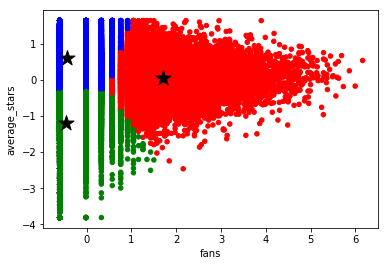
-Green and Blue clusters

**Elitism_Popularity_dependence:**
The higher the number of fans, the more number of elite years a user has.
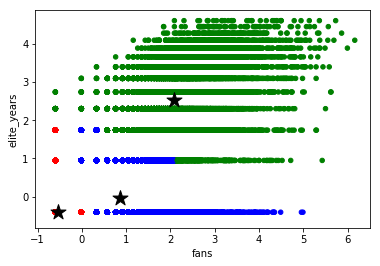
-Blue and Green Clusters

**Elitism_Friendship_dependence:**
The higher the number of friends, the more number of elite years a user has.
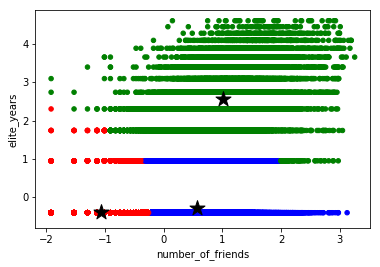
-Blue and Green Clusters

**Popularity_Friendship_dependence:**
The more friends a user has, the higher number of fans he/she has
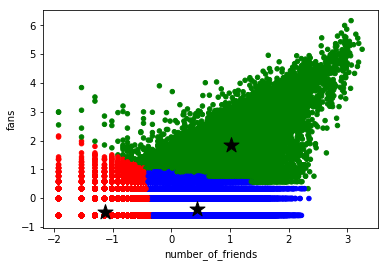
-Red and Green clusters

**Reviews_Fans_dependence:**
The higher the number of reviews the more fans a user has.
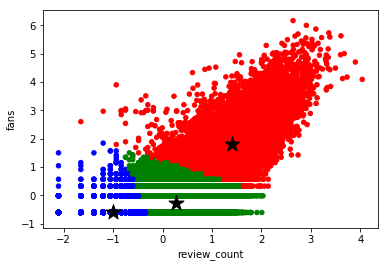
-All Clusters

**Compliments_stars_dependence:**
The centroids are not dependent on average stars.
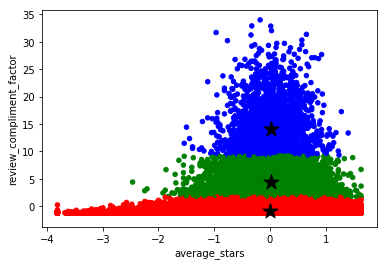
-All Clusters

**Compliments_Fans_dependence:**
The higher the number of fans the more compliments the user receives.
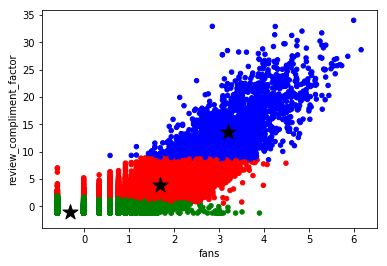
-All Clusters

**Reviews_compliments_dependence:**
The higher the number of reviews, the more compliments a user recieves.
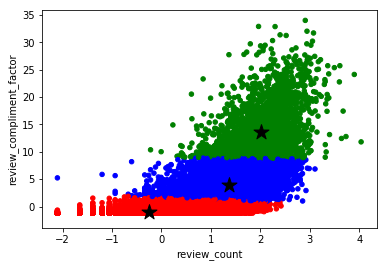
-Blue and Green Clusters

**Feedback_Friendship_dependence:**
The higher the number of friends the more review feedback a user recieves.
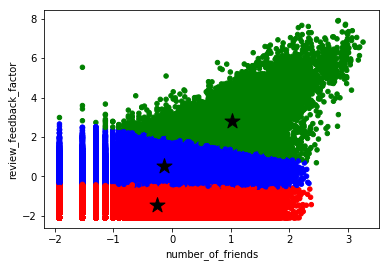
-All Clusters

**Feedback_Popularity_dependence:**
The higher the number of fans a user has the more feedbacks they get.
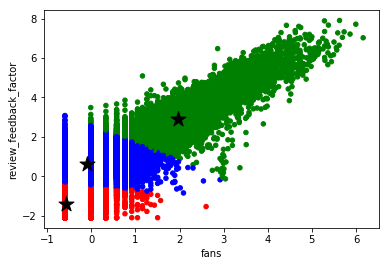
-All Clusters

**Feedback_Activeness_dependence:**
The more reviews a user gives the more feedbacks they get.
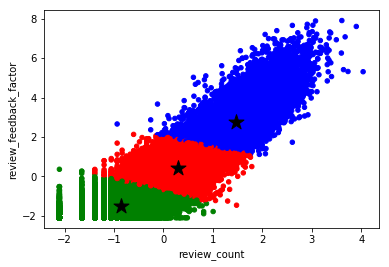
-All Clusters

**Compliments_Friendship_dependence:**
The higher the number of friends, the more compliments he/she user has.
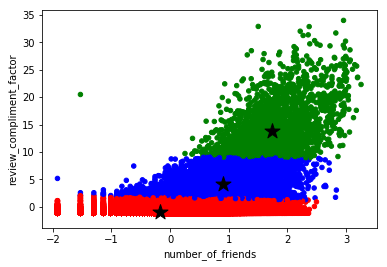
-Red and Green Clusters

**Elitism_Reviews_dependence:**
The more the number of elite years a user has had, the more the number of his/her review count.
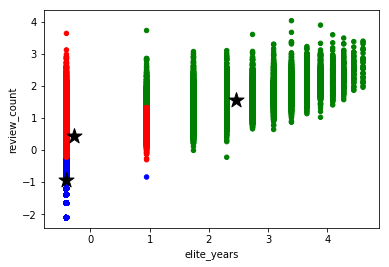
-All Clusters

**Feedback_compliment_dependence:**
The more feedbacks a user receives the higher the number of compliments he/she receives.
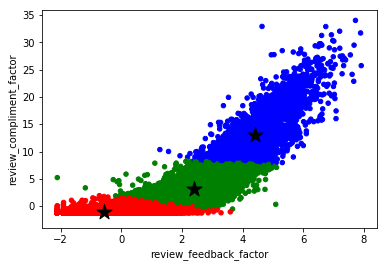
